In [1]:
# Ocean Heat Budget Analyses in the Antarctica continental shelf (WAOM)

# Fabio B Dias - 15 August 2023
# Description:
#     this script get the heat transport across 1500m calculate for individual experiments:
# WAOM10: WAOM10extend_shflim_S_0.25Q_Cross-1500m-Transport.ipynb
# WAOM4: WAOM4extend_shflim_S_0.25Q_Cross-1500m-Transport.py
# WAOM4-NOTIDE: WAOM4extend_shflim_S_0.25Q_notides_Cross-1500m-Transport.py
# WAOM2:
# and plot vertically-integrated analyses:
# 1) annual average



In [2]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

import pyresample

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [3]:
tmp_files_dir = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

In [4]:
# determine constants:
rho0 = 1025 # kg. m-3
Cp = 3989.245 # J.kg-1.degC-1
Tf = -1.95 # degC


In [5]:
# load ice draft to create masks
expt = 'WAOM10'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_daily')
# Tf_heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily')
heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily')
vol_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily')
temp_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily')
salt_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily')
z_rho_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_10km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_10km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [6]:
# define mean currents:
vol_transp_clim_10km = vol_transport_10km.mean('ocean_time')
# overwrite Tf_heat_transport_10km using climatological volume transport*Tf
Tf_heat_transport_10km = vol_transp_clim_10km*Tf*Cp*rho0

In [7]:
%%time

expt = 'WAOM4'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
# Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4km = vol_transport_4km*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + 'Zrho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m') 
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 43.9 ms, sys: 35.5 ms, total: 79.4 ms
Wall time: 401 ms


In [8]:
# define mean currents:
vol_transp_clim_4km = vol_transport_4km.mean('ocean_time')
# overwrite Tf_heat_transport_4kmNT using climatological volume transport*Tf
Tf_heat_transport_4km = vol_transp_clim_4km*Tf*Cp*rho0

In [9]:
%%time

expt = 'WAOM4'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
# Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4km = vol_transport_4km*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + 'Zrho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m') 
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 29.2 ms, sys: 9.02 ms, total: 38.3 ms
Wall time: 43.7 ms


In [10]:
%%time
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
Tf_heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4kmNT = vol_transport_4kmNT*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_daily')
# dist_along_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_daily')
# lon_along_4kmNT = ds.variables["one"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_daily')
# lat_along_4kmNT = ds.variables["two"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_daily')
# distance_indicesNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

CPU times: user 20.8 ms, sys: 14.6 ms, total: 35.3 ms
Wall time: 121 ms


In [11]:
# define mean currents:
vol_transp_clim_4kmNT = vol_transport_4kmNT.mean('ocean_time')
# overwrite Tf_heat_transport_4kmNT using climatological volume transport*Tf
Tf_heat_transport_4kmNT = vol_transp_clim_4kmNT*Tf*Cp*rho0

In [12]:
# define along_contour axis with same length for both resolutions:
[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))


# Obtain area of the section along the isobath contour:
# first get the distance/dy:
dy_10km_tmp = dist_along_axis_10km[:,1:-1] - dist_along_axis_10km[:,0:-2]
# repeate first and last dy to match size:
dy_10km = np.empty(dist_along_axis_10km.shape)
dy_10km[:,1:-1] =  dy_10km_tmp
dy_10km[:,0] =  dy_10km_tmp[:,0]
dy_10km[:,-1] =  dy_10km_tmp[:,-1]

# 4km: first get the distance/dy:
dy_4km_tmp = dist_along_axis_4km[:,1:-1] - dist_along_axis_4km[:,0:-2]
dy_4km = np.empty(dist_along_axis_4km.shape)
dy_4km[:,1:-1] =  dy_4km_tmp
dy_4km[:,0] =  dy_4km_tmp[:,0]
dy_4km[:,-1] =  dy_4km_tmp[:,-1]

# calculate area 
area_10km = dy_10km*1e6 # convert back to meters:
area_4km = dy_4km*1e6 # convert back to meters:


In [13]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'


# Decomposition mean and eddy heat transport:


## 2nd test w/ monthly transport/temperature fields for mean HT

In [14]:
%%time

# WAOM10
# re-sample to monthly following Palokzy 2018:
vol_transp_10km_monthly = np.empty((12,31,2588))
temp_10km_monthly  = np.empty((12,31,2588))

months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])

for mm in np.arange(0,12):
    # print(mm)
    aa=np.where(mm == months_flr)
    # print(aa[0])    
    # print(vol_transport_10km[aa[0],:,:].shape)

    temp_10km_monthly[mm,:] = temp_10km[aa[0],:,:].mean('ocean_time')
    # vol_transp_10km_monthly[mm,:] = np.nanmean(vol_transport_10km[aa[0],:,:], axis=0)
    vol_transp_10km_monthly[mm,:] = vol_transport_10km[aa[0],:,:].mean('ocean_time')
    del aa
    # print(vol_transp_10km_monthly.shape)


# total heat transport: average(vol_transp*T)
volxT_10km = vol_transp_10km_monthly*(temp_10km_monthly-Tf) # vT x Cp Rho0
Total_transp_10km =np.nanmean(volxT_10km, axis=0)

# mean heat transport: avg(vol_tranp)*avg(T)
vol_transp_10km_annual = np.nanmean(vol_transp_10km_monthly, axis=0)
temp_10km_annual = np.nanmean(temp_10km_monthly-Tf, axis=0)
Mean_transp_10km = vol_transp_10km_annual*temp_10km_annual

# eddy heat transport: (5-daily) vol_transp*T - total_HT
Eddy_transp_10km = np.empty(vol_transport_10km.shape)
for tt in range(0,365):
    Eddy_transp_10km_tmp =  - (Mean_transp_10km) + vol_transport_10km[tt,:,:]*(temp_10km[tt,:,:]-Tf)#*rho0*Cp
    #print(tt,Eddy_transp_10km_tmp.shape, Eddy_transp_10km.shape)
    Eddy_transp_10km[tt,:] = Eddy_transp_10km_tmp
    del Eddy_transp_10km_tmp
# FOR SOME REASON, IT SEEMS I NEED TO MULTIPLY EDDY HT by 12 (73 if using 5-daily fields)
    # -> then it matches (opposite sign) as the mean HT

CPU times: user 604 ms, sys: 322 ms, total: 926 ms
Wall time: 986 ms


In [15]:
vol_transport_10km.shape

(365, 31, 2588)

In [16]:
%%time

# WAOM4
# re-sample to monthly following Palokzy 2018:
vol_transp_4km_monthly = np.empty((12,31,6919))
temp_4km_monthly  = np.empty((12,31,6919))

months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])

for mm in np.arange(0,12):
    # print(mm)
    aa=np.where(mm == months_flr)
    # print(aa[0])    
    # print(vol_transport_4km[aa[0],:,:].shape)

    temp_4km_monthly[mm,:] = temp_4km[aa[0],:,:].mean('ocean_time')
    # vol_transp_4km_monthly[mm,:] = np.nanmean(vol_transport_4km[aa[0],:,:], axis=0)
    vol_transp_4km_monthly[mm,:] = vol_transport_4km[aa[0],:,:].mean('ocean_time')
    del aa
    # print(vol_transp_4km_monthly.shape)


# total heat transport: average(vol_transp*T)
volxT_4km = vol_transp_4km_monthly*(temp_4km_monthly-Tf) # vT x Cp Rho0
Total_transp_4km =np.nanmean(volxT_4km, axis=0)

# mean heat transport: avg(vol_tranp)*avg(T)
vol_transp_4km_annual = np.nanmean(vol_transp_4km_monthly, axis=0)
temp_4km_annual = np.nanmean(temp_4km_monthly-Tf, axis=0)
Mean_transp_4km = vol_transp_4km_annual*temp_4km_annual

# eddy heat transport: (5-daily) vol_transp*T - total_HT
Eddy_transp_4km = np.empty(vol_transport_4km.shape)
for tt in range(0,365):
    Eddy_transp_4km_tmp =  - (Mean_transp_4km) + vol_transport_4km[tt,:,:]*(temp_4km[tt,:,:]-Tf)#*rho0*Cp
    #print(tt,Eddy_transp_4km_tmp.shape, Eddy_transp_4km.shape)
    Eddy_transp_4km[tt,:] = Eddy_transp_4km_tmp
    del Eddy_transp_4km_tmp
# FOR SOME REASON, IT SEEMS I NEED TO MULTIPLY EDDY HT by 12 (73 if using 5-daily fields)
    # -> then it matches (opposite sign) as the mean HT

CPU times: user 1.88 s, sys: 1.6 s, total: 3.48 s
Wall time: 3.56 s


In [17]:
%%time

# WAOM4-NOTIDE
# re-sample to monthly following Palokzy 2018:
vol_transp_4kmNT_monthly = np.empty((12,31,6919))
temp_4kmNT_monthly  = np.empty((12,31,6919))

months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])

for mm in np.arange(0,12):
    # print(mm)
    aa=np.where(mm == months_flr)
    # print(aa[0])    
    # print(vol_transport_4km[aa[0],:,:].shape)

    temp_4kmNT_monthly[mm,:] = temp_4kmNT[aa[0],:,:].mean('ocean_time')
    # vol_transp_4kmNT_monthly[mm,:] = np.nanmean(vol_transport_4km[aa[0],:,:], axis=0)
    vol_transp_4kmNT_monthly[mm,:] = vol_transport_4kmNT[aa[0],:,:].mean('ocean_time')
    del aa
    # print(vol_transp_4kmNT_monthly.shape)


# total heat transport: average(vol_transp*T)
volxT_4kmNT = vol_transp_4kmNT_monthly*(temp_4kmNT_monthly-Tf) # vT x Cp Rho0
Total_transp_4kmNT =np.nanmean(volxT_4kmNT, axis=0)

# mean heat transport: avg(vol_tranp)*avg(T)
vol_transp_4kmNT_annual = np.nanmean(vol_transp_4kmNT_monthly, axis=0)
temp_4kmNT_annual = np.nanmean(temp_4kmNT_monthly-Tf, axis=0)
Mean_transp_4kmNT = vol_transp_4kmNT_annual*temp_4kmNT_annual

# eddy heat transport: (5-daily) vol_transp*T - total_HT
Eddy_transp_4kmNT = np.empty(vol_transport_4kmNT.shape)
for tt in range(0,365):
    Eddy_transp_4kmNT_tmp =  - (Mean_transp_4kmNT) + vol_transport_4kmNT[tt,:,:]*(temp_4kmNT[tt,:,:]-Tf)#*rho0*Cp
    #print(tt,Eddy_transp_4kmNT_tmp.shape, Eddy_transp_4km.shape)
    Eddy_transp_4kmNT[tt,:] = Eddy_transp_4kmNT_tmp
    del Eddy_transp_4kmNT_tmp
# FOR SOME REASON, IT SEEMS I NEED TO MULTIPLY EDDY HT by 12 (73 if using 5-daily fields)
    # -> then it matches (opposite sign) as the mean HT

CPU times: user 1.27 s, sys: 1.15 s, total: 2.42 s
Wall time: 2.61 s


In [18]:
Mean_transp_10km.shape

(31, 2588)

(0.0, 22.1720286608308)

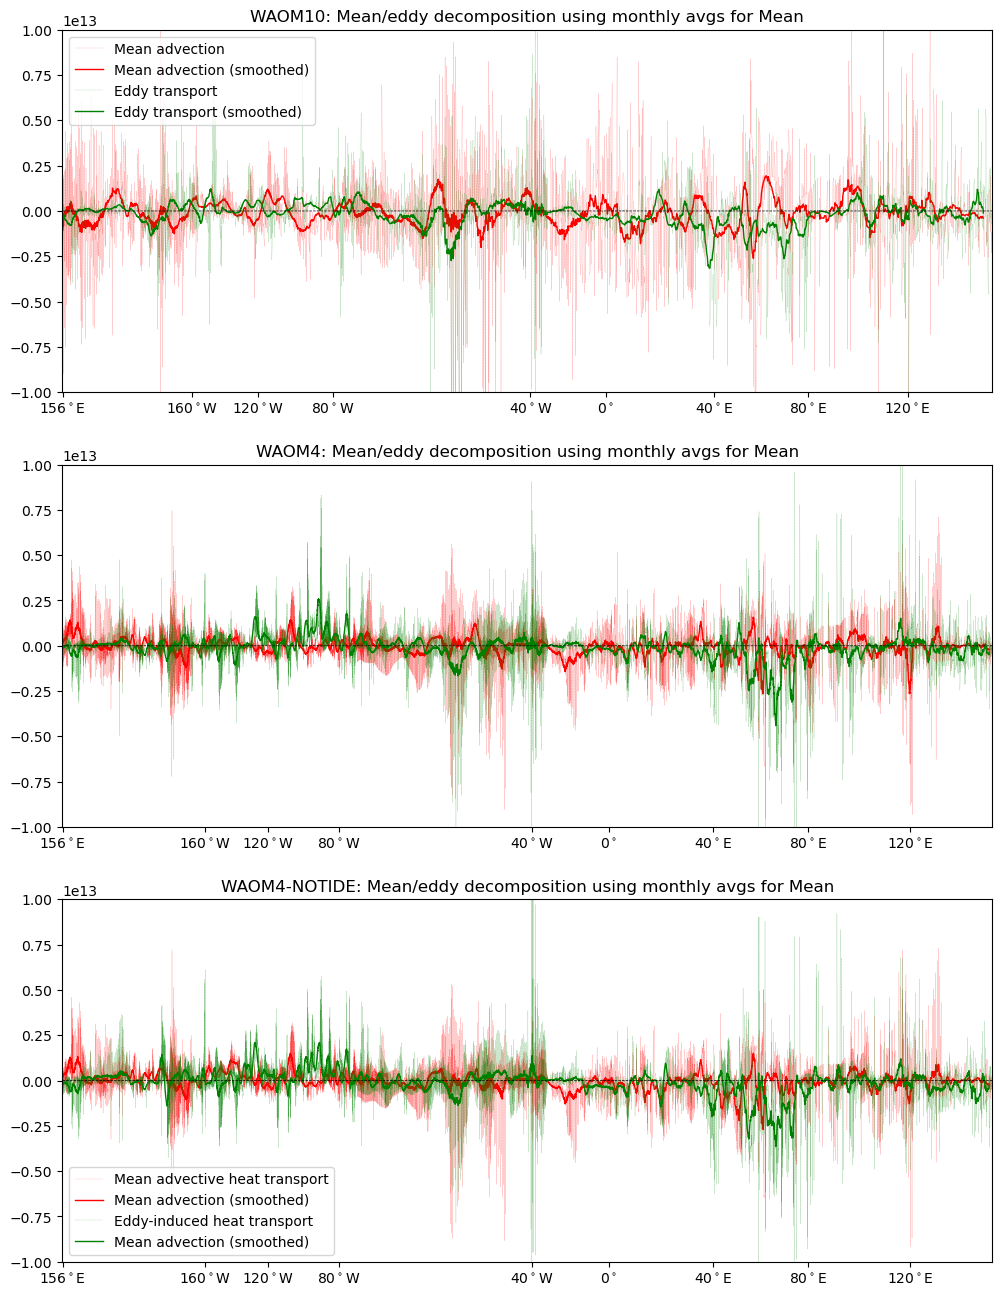

In [19]:
# - plot vert-summed:
fig, ax = plt.subplots(nrows=3, figsize = (12, 16))

# WAOM10
ax[0].plot(dist_along_10km[:],np.sum(Mean_transp_10km[:,:], axis=0)*Cp*rho0,'--r',label='Mean advection', linewidth=0.1)
x=np.sum(Mean_transp_10km[:,:], axis=0)*Cp*rho0
N=25 # groups of points along the contour line - use dist to translate to distance (average throughout)
ax[0].plot(dist_along_10km[np.arange(0,len(Mean_transp_10km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

eddy_fac = 73
ax[0].plot(dist_along_10km[:],np.sum(np.nanmean(Eddy_transp_10km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0,'--g',label='Eddy transport', linewidth=0.1)
x=np.sum(np.nanmean(Eddy_transp_10km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[0].plot(dist_along_10km[np.arange(0,len(Mean_transp_10km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Eddy transport (smoothed)',linewidth=1) 

ax[0].plot(dist_along_10km[:],np.zeros(Mean_transp_10km[0,:].shape),'--k', linewidth=0.5)
ax[0].set_ylim(-1e13,1e13)
ax[0].set_title('WAOM10: Mean/eddy decomposition using monthly avgs for Mean')
ax[0].legend()
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])

# WAOM4
ax[1].plot(dist_along_4km[:],np.sum(Mean_transp_4km[:,:], axis=0)*Cp*rho0,'--r',label='Mean advective heat transport', linewidth=0.1)
x=np.sum(Mean_transp_4km[:,:], axis=0)*Cp*rho0
ax[1].plot(dist_along_4km[np.arange(0,len(Mean_transp_4km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

ax[1].plot(dist_along_4km[:],np.sum(np.nanmean(Eddy_transp_4km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0,'--g',label='Eddy-induced heat transport', linewidth=0.1)
x=np.sum(np.nanmean(Eddy_transp_4km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[1].plot(dist_along_4km[np.arange(0,len(Mean_transp_4km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Mean advection (smoothed)',linewidth=1) 

ax[1].plot(dist_along_4km[:],np.zeros(Mean_transp_4km[0,:].shape),'--k', linewidth=0.5)
ax[1].set_ylim(-1e13,1e13)
ax[1].set_title('WAOM4: Mean/eddy decomposition using monthly avgs for Mean')
# ax[1].legend()
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])

# WAOM4-NT
ax[2].plot(dist_along_4km[:],np.sum(Mean_transp_4kmNT[:,:], axis=0)*Cp*rho0,'--r',label='Mean advective heat transport', linewidth=0.1)
x=np.sum(Mean_transp_4kmNT[:,:], axis=0)*Cp*rho0
ax[2].plot(dist_along_4km[np.arange(0,len(Mean_transp_4kmNT[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

ax[2].plot(dist_along_4km[:],np.sum(np.nanmean(Eddy_transp_4kmNT[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0,'--g',label='Eddy-induced heat transport', linewidth=0.1)
x=np.sum(np.nanmean(Eddy_transp_4kmNT[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[2].plot(dist_along_4km[np.arange(0,len(Mean_transp_4kmNT[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Mean advection (smoothed)',linewidth=1) 

ax[2].plot(dist_along_4km[:],np.zeros(Mean_transp_4kmNT[0,:].shape),'--k', linewidth=0.5)
ax[2].set_ylim(-1e13,1e13)
ax[2].set_title('WAOM4-NOTIDE: Mean/eddy decomposition using monthly avgs for Mean')
ax[2].legend()
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])


(0.0, 22.1720286608308)

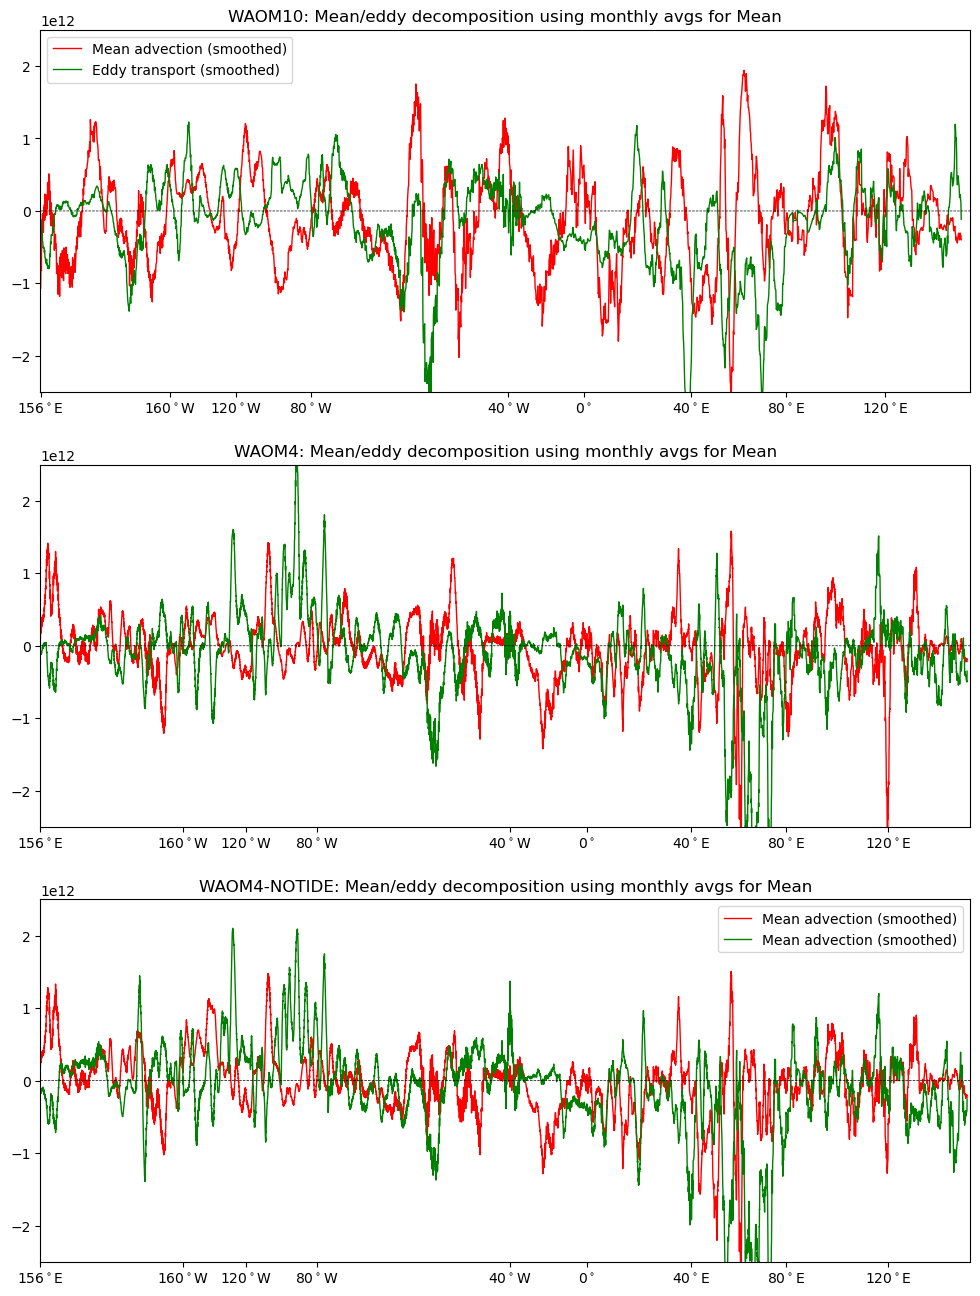

In [20]:
# - plot vert-summed:
fig, ax = plt.subplots(nrows=3, figsize = (12, 16))

# WAOM10
x=np.sum(Mean_transp_10km[:,:], axis=0)*Cp*rho0
N=25 # groups of points along the contour line - use dist to translate to distance (average throughout)
ax[0].plot(dist_along_10km[np.arange(0,len(Mean_transp_10km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

eddy_fac = 73
x=np.sum(np.nanmean(Eddy_transp_10km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[0].plot(dist_along_10km[np.arange(0,len(Mean_transp_10km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Eddy transport (smoothed)',linewidth=1) 

ax[0].plot(dist_along_10km[:],np.zeros(Mean_transp_10km[0,:].shape),'--k', linewidth=0.5)
ax[0].set_ylim(-.25e13,.25e13)
ax[0].set_title('WAOM10: Mean/eddy decomposition using monthly avgs for Mean')
ax[0].legend()
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])

# WAOM4
x=np.sum(Mean_transp_4km[:,:], axis=0)*Cp*rho0
ax[1].plot(dist_along_4km[np.arange(0,len(Mean_transp_4km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

x=np.sum(np.nanmean(Eddy_transp_4km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[1].plot(dist_along_4km[np.arange(0,len(Mean_transp_4km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Mean advection (smoothed)',linewidth=1) 

ax[1].plot(dist_along_4km[:],np.zeros(Mean_transp_4km[0,:].shape),'--k', linewidth=0.5)
ax[1].set_ylim(-.25e13,.25e13)
ax[1].set_title('WAOM4: Mean/eddy decomposition using monthly avgs for Mean')
# ax[1].legend()
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])

# WAOM4-NT
x=np.sum(Mean_transp_4kmNT[:,:], axis=0)*Cp*rho0
ax[2].plot(dist_along_4km[np.arange(0,len(Mean_transp_4kmNT[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

x=np.sum(np.nanmean(Eddy_transp_4kmNT[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[2].plot(dist_along_4km[np.arange(0,len(Mean_transp_4kmNT[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Mean advection (smoothed)',linewidth=1) 

ax[2].plot(dist_along_4km[:],np.zeros(Mean_transp_4kmNT[0,:].shape),'--k', linewidth=0.5)
ax[2].set_ylim(-.25e13,.25e13)
ax[2].set_title('WAOM4-NOTIDE: Mean/eddy decomposition using monthly avgs for Mean')
ax[2].legend()
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])


In [21]:
mean_cumsum_10km = np.cumsum(np.sum(Mean_transp_10km[:,:], axis=0)*Cp*rho0)
eddy_cumsum_10km = np.cumsum(np.sum(np.nanmean(Eddy_transp_10km[:,:,:], axis=0), axis=0)*12*Cp*rho0)
print(mean_cumsum_10km[-1]*1e-12)
print(eddy_cumsum_10km[-1]*1e-12)

# IT DOES MAKE SENSE, MEAN + EDDY WOULD BE AROUND -230 TW ->  -270 TW AT WAOM10

-298.5489727380431
-85.27034628738112


In [ ]:
# - plot vert-summed:
fig, ax = plt.subplots(nrows=3, figsize = (15, 10))
# waom10
# ax[0].plot(dist_along_10km[:],np.cumsum(np.sum(Mean_transp_10km[:,:], axis=0)*Cp*rho0),'--r',label='Mean advective heat transport (1m)', linewidth=0.5)
# ax[0].plot(dist_along_10km[:],np.cumsum(np.sum(np.nanmean(Eddy_transp_10km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0),'-g',label='Eddy-induced heat transport (1m)', linewidth=1)
# ax[0].plot(dist_along_10km[:],np.zeros(Mean_transp_10km[0,:].shape),'--k', linewidth=0.5)
# ax[0].set_title('WAOM10: Mean/eddy decomposition using monthly avgs for Mean')
# plt.legend()
# ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
# ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                           '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
# ax[0].set_xlim(0, dist_along_10km[-1])

# waom4
# ax[1].plot(dist_along_4km[:],np.cumsum(np.sum(Mean_transp_4km[:,:], axis=0)*Cp*rho0),'--r',label='Mean advective heat transport (1m)', linewidth=0.5)
# ax[1].plot(dist_along_4km[:],np.cumsum(np.sum(np.nanmean(Eddy_transp_4km[:,:,:], axis=0), axis=0)*12*Cp*rho0),'-g',label='Eddy-induced heat transport (1m)', linewidth=1)
# ax[1].plot(dist_along_4km[:],np.zeros(Mean_transp_4km[0,:].shape),'--k', linewidth=0.5)
# ax[1].set_title('WAOM4: Mean/eddy decomposition using monthly avgs for Mean')
# # plt.legend()
# ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
# ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                           '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
# ax[1].set_xlim(0, dist_along_4km[-1])


# 4) Mask Ross (140W : 160E, lat < -60)
ax[2].text(2.895576e+00-1.5,-6e14,'Ross',fontsize=14, color='k')
ax[2].text(3.634185,-6e14,'|',fontsize=14, color='k')
# 5) Mask West Antarctica (150W : 90W, lat < -65)
ax[2].text(4.1,-6e14,'West Antarctica',fontsize=14, color='k')
ax[2].text(8,-6e14,'|',fontsize=14, color='k')
# 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
ax[2].text(9,-6e14,'Weddell',fontsize=14, color='k')
ax[2].text(11.5,-6e14,'|',fontsize=14, color='k')
# 2) Mask Maud Land (25W : 60E, lat < -60)
ax[2].text(12,-6e14,'Maud Land',fontsize=14, color='k')
ax[2].text(15,-6e14,'|',fontsize=14, color='k')
# 3) Mask East Antarctica (60E : 160E, lat < -60)
ax[2].text(17,-6e14,'East Antarctica',fontsize=14, color='k')